In [1]:
import pandas as pd

# Load both sheets
file_path = r"C:\Users\venku\dsi\DSI_ML6\Online_Retail_II\my_work\Online_Retail_II.xlsx"
sheet1 = pd.read_excel(file_path, sheet_name="Year 2009-2010")
sheet2 = pd.read_excel(file_path, sheet_name="Year 2010-2011")

# Combine them
combined = pd.concat([sheet1, sheet2])

# Remove duplicates (across all columns)
combined_unique = combined.drop_duplicates()

# Save to new file
combined_unique.to_excel(r"C:\Users\venku\dsi\DSI_ML6\Online_Retail_II\my_work\combined_unique.xlsx",
    index=False)

print("✅ Combined and duplicates removed. Saved as combined_unique.xlsx")

✅ Combined and duplicates removed. Saved as combined_unique.xlsx


In [2]:
df = pd.read_excel("combined_unique.xlsx")
df.head() 
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033036 entries, 0 to 1033035
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1033036 non-null  object        
 1   StockCode    1033036 non-null  object        
 2   Description  1028761 non-null  object        
 3   Quantity     1033036 non-null  int64         
 4   InvoiceDate  1033036 non-null  datetime64[ns]
 5   Price        1033036 non-null  float64       
 6   Customer ID  797885 non-null   float64       
 7   Country      1033036 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 63.1+ MB


,Quantity,InvoiceDate,Price,Customer ID
count,1.033036e+06,1033036,1.033036e+06,797885.000000
mean,1.007688e+01,2011-01-03 14:30:35.429549824,4.613980e+00,15313.062777
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000
25%,1.000000e+00,2010-07-05 11:38:00,1.250000e+00,13964.000000
50%,3.000000e+00,2010-12-09 13:34:00,2.100000e+00,15228.000000
75%,1.000000e+01,2011-07-27 13:17:00,4.150000e+00,16788.000000
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000
std,1.751976e+02,NaN,1.223975e+02,1696.466663


In [8]:
num_unique_invoices = df['Invoice'].nunique()
print(f"Number of unique invoices: {num_unique_invoices}")



Number of unique invoices: 53628


In [10]:
blank_descriptions = df[df['Description'].isna() | (df['Description'].str.strip() == "")]
print(blank_descriptions)
print(f"Number of rows with blank descriptions: {len(blank_descriptions)}")

        Invoice StockCode Description  Quantity         InvoiceDate  Price  \
462      489521     21646         NaN       -50 2009-12-01 11:44:00    0.0   
3077     489655     20683         NaN       -44 2009-12-01 17:26:00    0.0   
3124     489659     21350         NaN       230 2009-12-01 17:39:00    0.0   
3687     489781     84292         NaN        17 2009-12-02 11:45:00    0.0   
4233     489806     18010         NaN      -770 2009-12-02 12:42:00    0.0   
...         ...       ...         ...       ...                 ...    ...   
1026488  581199     84581         NaN        -2 2011-12-07 18:26:00    0.0   
1026492  581203     23406         NaN        15 2011-12-07 18:31:00    0.0   
1026498  581209     21620         NaN         6 2011-12-07 18:35:00    0.0   
1028147  581234     72817         NaN        27 2011-12-08 10:33:00    0.0   
1029703  581408     85175         NaN        20 2011-12-08 14:06:00    0.0   

         Customer ID         Country  
462              NaN  Un

In [13]:
df = df[~(df['Description'].isna() | (df['Description'].str.strip() == ""))]
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1028761 entries, 0 to 1033035
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1028761 non-null  object        
 1   StockCode    1028761 non-null  object        
 2   Description  1028761 non-null  object        
 3   Quantity     1028761 non-null  int64         
 4   InvoiceDate  1028761 non-null  datetime64[ns]
 5   Price        1028761 non-null  float64       
 6   Customer ID  797885 non-null   float64       
 7   Country      1028761 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 70.6+ MB


In [14]:
df.to_excel(
    r"C:\Users\venku\dsi\DSI_ML6\Online_Retail_II\my_work\cleaned_no_blank_descriptions.xlsx",
    index=False
)

In [15]:
df = pd.read_excel(r"C:\Users\venku\dsi\DSI_ML6\Online_Retail_II\my_work\cleaned_no_blank_descriptions.xlsx")
df.head() 
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028761 entries, 0 to 1028760
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1028761 non-null  object        
 1   StockCode    1028761 non-null  object        
 2   Description  1028761 non-null  object        
 3   Quantity     1028761 non-null  int64         
 4   InvoiceDate  1028761 non-null  datetime64[ns]
 5   Price        1028761 non-null  float64       
 6   Customer ID  797885 non-null   float64       
 7   Country      1028761 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 62.8+ MB


,Quantity,InvoiceDate,Price,Customer ID
count,1.028761e+06,1028761,1.028761e+06,797885.000000
mean,1.019092e+01,2011-01-04 01:16:01.831971328,4.633153e+00,15313.062777
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000
25%,1.000000e+00,2010-07-05 14:41:00,1.250000e+00,13964.000000
50%,3.000000e+00,2010-12-09 14:09:00,2.100000e+00,15228.000000
75%,1.000000e+01,2011-07-27 15:16:00,4.150000e+00,16788.000000
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000
std,1.723738e+02,NaN,1.226512e+02,1696.466663


In [16]:
df = df[df['Quantity'] >= 0]
print(df['Quantity'].min())  # should now be >= 0
print(f"Remaining rows: {len(df)}")
df.to_excel(
    r"C:\Users\venku\dsi\DSI_ML6\Online_Retail_II\my_work\final_cleaned_data.xlsx",
    index=False
)

1
Remaining rows: 1008898


In [17]:
df = pd.read_excel(r"C:\Users\venku\dsi\DSI_ML6\Online_Retail_II\my_work\final_cleaned_data.xlsx")
df.head() 
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008898 entries, 0 to 1008897
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1008898 non-null  object        
 1   StockCode    1008898 non-null  object        
 2   Description  1008898 non-null  object        
 3   Quantity     1008898 non-null  int64         
 4   InvoiceDate  1008898 non-null  datetime64[ns]
 5   Price        1008898 non-null  float64       
 6   Customer ID  779495 non-null   float64       
 7   Country      1008898 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 61.6+ MB


,Quantity,InvoiceDate,Price,Customer ID
count,1.008898e+06,1008898,1.008898e+06,779495.000000
mean,1.117514e+01,2011-01-04 10:43:53.267724032,3.913368e+00,15320.262918
min,1.000000e+00,2009-12-01 07:45:00,-5.359436e+04,12346.000000
25%,1.000000e+00,2010-07-06 11:29:00,1.250000e+00,13971.000000
50%,4.000000e+00,2010-12-09 15:32:00,2.100000e+00,15246.000000
75%,1.200000e+01,2011-07-28 12:09:00,4.130000e+00,16794.000000
max,8.099500e+04,2011-12-09 12:50:00,2.511109e+04,18287.000000
std,1.296677e+02,NaN,9.515946e+01,1695.722988


In [24]:
# Group by Invoice and count unique StockCodes
unique_items_per_invoice = df.groupby('Invoice')['StockCode'].nunique().reset_index()

# Rename the column for clarity
unique_items_per_invoice.rename(columns={'StockCode': 'Unique_Items'}, inplace=True)

print(unique_items_per_invoice.head())


  Invoice  Unique_Items
0  489434             8
1  489435             4
2  489436            19
3  489437            23
4  489438            17


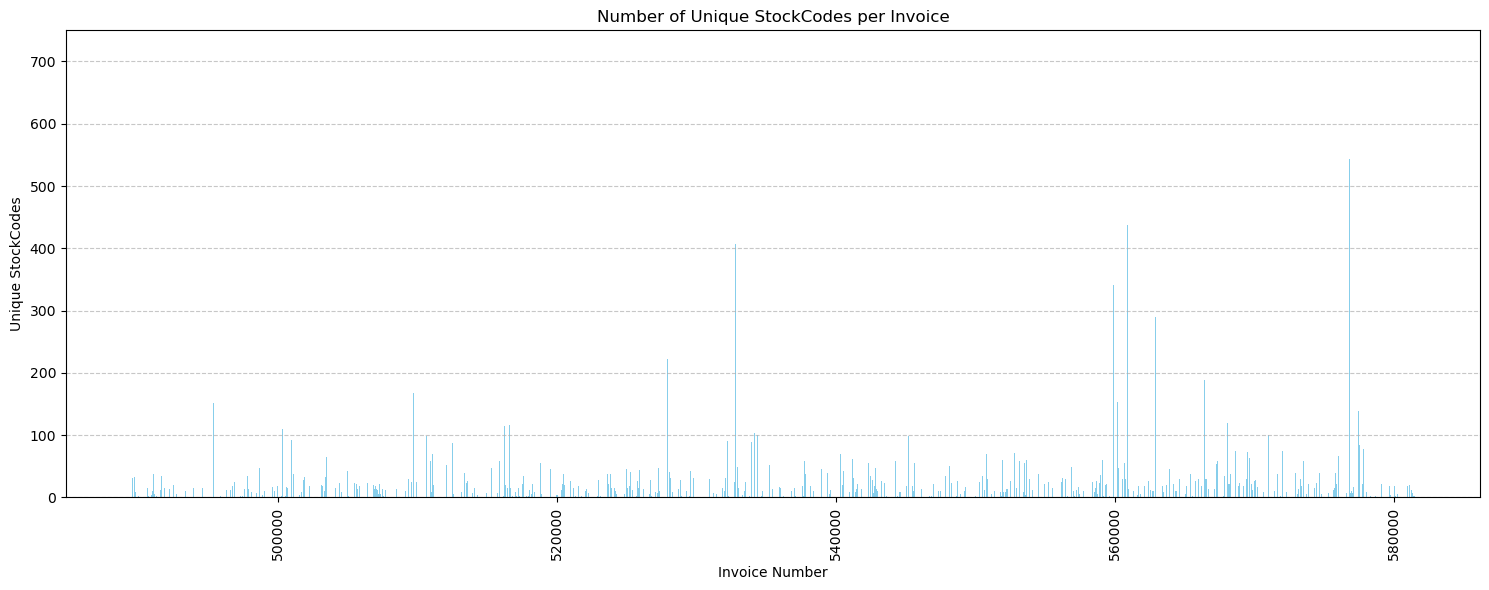

In [28]:
import matplotlib.pyplot as plt

# Ensure Invoice is numeric (coerce invalid values to NaN)
unique_items_per_invoice['Invoice'] = pd.to_numeric(unique_items_per_invoice['Invoice'], errors='coerce')

# Drop any rows where Invoice could not be converted
unique_items_per_invoice = unique_items_per_invoice.dropna(subset=['Invoice'])

# Sort invoices
unique_items_per_invoice = unique_items_per_invoice.sort_values('Invoice')

# Create bar chart
plt.figure(figsize=(15,6))
plt.bar(
    unique_items_per_invoice['Invoice'].astype(int),  # X-axis: actual invoice numbers
    unique_items_per_invoice['Unique_Items'],        # Y-axis: number of unique StockCodes
    color='skyblue'
)

# Titles and labels
plt.title("Number of Unique StockCodes per Invoice")
plt.xlabel("Invoice Number")
plt.ylabel("Unique StockCodes")

# Adjust Y-axis range
plt.ylim(0, 750)  

# Rotate X-axis labels if needed
plt.xticks(rotation=90)

# Add horizontal grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()




In [31]:
unique_stockcodes_per_invoice = df.groupby('Invoice')['StockCode'].unique().reset_index()

# Rename column for clarity
unique_stockcodes_per_invoice.rename(columns={'StockCode': 'Unique_StockCodes'}, inplace=True)

print(unique_stockcodes_per_invoice.head())
print(unique_stockcodes_per_invoice['Unique_StockCodes'].iloc[0])  # Print unique StockCodes for the first invoice
print(unique_stockcodes_per_invoice['Unique_StockCodes'].iloc[1000])  # Print unique StockCodes for the first invoice



  Invoice                                  Unique_StockCodes
0  489434  [85048, 79323P, 79323W, 22041, 21232, 22064, 2...
1  489435                       [22350, 22349, 22195, 22353]
2  489436  [48173C, 21755, 21754, 84879, 22119, 22142, 22...
3  489437  [22143, 22145, 22130, 21364, 21360, 21351, 213...
4  489438  [21329, 21252, 21100, 21033, 20711, 21410, 214...
[85048 '79323P' '79323W' 22041 21232 22064 21871 21523]
['16168S' 85224 21946 21944 21849 21846 21711 21710 21709 21708 21707
 21706 21581 21579 21100 21033 21040 20731 20714 '16207B' 85221 85222]


In [32]:
unique_stockcodes_per_invoice.to_excel(
    r"C:\Users\venku\dsi\DSI_ML6\Online_Retail_II\my_work\unique_stockcodes_per_invoice.xlsx",
    index=False
)

In [33]:
df = pd.read_excel(r"C:\Users\venku\dsi\DSI_ML6\Online_Retail_II\my_work\unique_stockcodes_per_invoice.xlsx")
df.head() 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40302 entries, 0 to 40301
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Invoice            40302 non-null  object
 1   Unique_StockCodes  40302 non-null  object
dtypes: object(2)
memory usage: 629.8+ KB


In [34]:
# Add a column for the count of unique StockCodes
unique_stockcodes_per_invoice['Num_Unique_StockCodes'] = unique_stockcodes_per_invoice['Unique_StockCodes'].apply(len)
# Get the row with the maximum count
max_invoice = unique_stockcodes_per_invoice.loc[
    unique_stockcodes_per_invoice['Num_Unique_StockCodes'].idxmax()
]

print("Invoice with highest number of unique StockCodes:")
print(max_invoice)


Invoice with highest number of unique StockCodes:
Invoice                                                             573585
Unique_StockCodes        [11001, 15036, 15039, 15056BL, 15056N, 15058C,...
Num_Unique_StockCodes                                                 1110
Name: 36619, dtype: object
